<div style="display: flex;">
  <div style="flex: 33%;">
      <img src="https://upload.wikimedia.org/wikipedia/commons/4/43/Emblema_Universidad_de_Sevilla.png" width=150>
  </div>
  <div style="flex: 66%; margin: 1em; text-align: center;">

<h1> Máster Propio en Data Science y Big Data (IV Edición) </h1>
<h2> Introducción a la Programación en Python y a los Paradigmas para Datos (IPPPD) </h2>

  </div>
</div>

### Instructor
<br/>
<div style="display: flex;">
  <div style="flex: 50%;">
      <img src="https://www.dropbox.com/s/8u2cy57qpz4yx1y/profile_pic.jpg?raw=1" width=200/>
  </div>
  <div style="flex: 50%;margin: 1em;">
      <b>Javier de la Rosa</b>, <a href="mailto:versae@linhd.uned.es"><i>versae@linhd.uned.es</i></a>, <a href="https://twitter.com/versae"><i>@versae</i></a>
      <br />
      <br />
      <div style="padding-left: 1em;">
      Postdoctoral Researcher en el Proyecto Europeo POSTDATA de la UNED
      <br />
      PhD, Estudios Hispánicos y Humanidades Digitales, University of Western Ontario, Canada
      <br />
      Máster en Inteligencia Artificial, Universidad de Sevilla, España
      <br />
      <br />
      Ex-Ingeniero de Investigación en la Stanford University, California
      <br />
      Ex-Director Técnico del laboratorio de investigación CulturePlex Lab en la University of Western Ontario, Canada
      </div>
  </div>
</div>

### NumPy

Este notebook contiene el código y las explicaciones del paquete de computación numérica NumPy.

Los libros de referencia son:

- [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) de Jake VanderPlas, cuyo contenido está parcialmente disponible [en GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).
- [Python for Data Analysis (2nd Edition)](https://learning.oreilly.com/library/view/python-for-data/9781491957653/) de Wes McKinney, cuyo contenido está parcialmente disponible [en GitHub](https://github.com/wesm/pydata-book).


## Setup

Aunque sólo el paquete `numpy` es necesario, algunas referencias van a requerir paquetes extra. Para aquellos que usen Conda debería venir incluido. En cualquier caso se puede instalar desde Jupyter.

In [1]:
%%capture
!pip install numpy matplotlib seaborn pandas version_information tqdm
#!conda install -c conda-forge numpy matplotlib seaborn pandas version_information tqdm

Veamos rápidamente con qué versiones estamos trabajando.

In [2]:
%reload_ext version_information
%version_information numpy, matplotlib, seaborn, pandas, tqdm

Software versions
Python 3.7.5 64bit [GCC 5.4.0 20160609]
IPython 7.9.0
OS Linux 4.4.0 161 generic x86_64 with debian stretch sid
numpy 1.17.3
matplotlib 3.1.1
seaborn 0.9.0
pandas 0.25.3
tqdm 4.37.0
Thu Nov 07 01:54:58 2019 CET

Generemos una pequeña función para controlar el tiempo

In [3]:
import time
from tqdm.notebook import tnrange

countdown = lambda s: ([time.sleep(1) for i in tnrange(s, desc=f"{s} sec.")]
                       and print("Tiempo!"))
countdown(1)


Tiempo!


## Una lista Python es más que simplemente una lista...

Consideremos qué sucede cuando usamos una estructura de datos Python que contiene objetos Python. El contenedor estándar mutable multi-elemento en Python es la lista. Creemos una lista de números enteros.

In [4]:
l = list(range(10))
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
type(l)

list

 O por ejemplo una lista de cadenas

In [6]:
l2 = [str(c) for c in l]
l2

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [7]:
type(l2[0])

str

Y como Python usa tipado dinámico, podemos incluso crear listas heterogéneas.

In [8]:
l3 = [True, "2", 3.0, 4]
[type(item) for item in l3]

[bool, str, float, int]

Pero esta flexibilidad tiene un coste: para permitir estos tipos flexibles, cada elemento de la lista debe contener su propia información de tipo, conteo de referencia, e información extra del tipo, es decir, cada elemento es un objeto Python completo.
En el caso especial de que todas las variables sean del mismo tipo, gran parte de esta información es redundante: puede ser mucho más eficiente almacenar datos en una matriz de tipo fijo.
La diferencia entre una lista de tipo dinámico y un array de tipo fijo (estilo NumPy) se ilustra en la siguiente figura:

![Array Memory Layout](https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/figures/array_vs_list.png)
<div style="float: right;">
<small>&mdash; Fuente: [Python Data Science Handbook](http://github.com/jakevdp/PythonDataScienceHandbook)</small>
</div>

<br />

A nivel de implementación, la matriz contiene esencialmente un solo puntero a un bloque contiguo de datos.
La lista de Python, por otro lado, contiene un puntero a un bloque de punteros, cada uno de los cuales a su vez apunta a un objeto Python completo.

Una vez más, la ventaja de la lista es la flexibilidad: debido a que cada elemento de la lista es una estructura completa que contiene tanto datos como información de tipo, la lista se puede rellenar con datos de cualquier tipo que se desee.
Los arreglos de tipo fijo como en NumPy carecen de esta flexibilidad, pero son mucho más eficientes para almacenar y manipular datos.

## Arrays de tipo fijo en Python

Python ofrece varias opciones diferentes para almacenar datos en búferes de datos eficientes y de tipo fijo.
El módulo `'array'`, incorporado desde Python 3.3, puede utilizarse para crear arrays densos de tipo uniforme:

In [9]:
import array
l = list(range(10))
a = array.array('i', l)
a

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Aquí `'i'` es un código de tipo que indica que los contenidos son enteros.

Probemos a sumar el array `a`.

In [10]:
a + a

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Parece que el resultado no es muy intuitivo.

Mucho más útil, sin embargo, es el objeto ``ndarray`` del paquete NumPy.
Mientras que el objeto ``array`` de Python proporciona un almacenamiento eficiente de los datos basados en matrices, NumPy añade a esta eficiencia *operaciones* sobre esos datos.

Comenzaremos con la importación estándar de NumPy, bajo el alias ``np``:

In [11]:
import numpy as np

## Creando arrays a partir de listas Python

Podemos usar `np.array` para crear arrays a partir de listas Python:

In [12]:
# un array de números enteros
np.array([1, 34, 2, 56, 78, 21349])

array([    1,    34,     2,    56,    78, 21349])

Los arrays en NumPy, mientras no se indique lo contrario, sólo pueden contener elementos del mismo tipo. Por lo que por defecto, NumPy tratará de encontrar el tipo más genérico que los contenga.

In [13]:
np.array([1, 3.4, "bañáis"])

array(['1', '3.4', 'bañáis'], dtype='<U32')

Pero siempre podemos forzar a que el tipo de un array esté predefinido.

In [14]:
np.array([1.2, 3.5, 67.8], dtype=np.float32)

array([ 1.2,  3.5, 67.8], dtype=float32)

En cuyo caso, si intentamos añadir elementos que otro tipo para el cual la operación de casting no está permitida obtendremos un error.

In [15]:
try:
    np.array([1.2, 3.5, "bañáis"], dtype=np.float32)
except ValueError as e:
    print(e)

could not convert string to float: 'bañáis'


Una de las cosas más importantes, es que los arrays en NumPy pueden ser multidimensionales, de ahí el nombre interno del tipo, `ndarray`, que hace referencia a *N-Dimensional Array* (array n-dimensional).

Estos arrays multidimensionales se puden crear usando listas que contengan otras listas o cualquier proceso que las genere.

In [16]:
np.array([[1, 2, 3], [4, 5, 6], [6, 7, 8]])

array([[1, 2, 3],
       [4, 5, 6],
       [6, 7, 8]])

In [17]:
for i in [2, 4, 6]:
    print(list(range(i, i + 3)))

[2, 3, 4]
[4, 5, 6]
[6, 7, 8]


In [18]:
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

## Creando arrays desde cero

Para ciertos tipos de array, NumPy proporciona una serie de funciones que permite crearlos fácilmente de manera parametrizada.

In [19]:
# Crear un array de enteros de longitud 10 relleno de ceros
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
# Crear un array de 3 filas y 5 columnas de elementos en coma flotante sólo relleno con unos
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [21]:
# Array 3x5 con un mismo número, por ejemplo, 2.71
np.full((3, 5), 2.71)

array([[2.71, 2.71, 2.71, 2.71, 2.71],
       [2.71, 2.71, 2.71, 2.71, 2.71],
       [2.71, 2.71, 2.71, 2.71, 2.71]])

In [22]:
# Array con una secuencia lineal.
# Al estilo de la función range, comenzando en 0, terminando en 20 (no inclusivo), y cada 2
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [23]:
# Array de 5 elementos uniformemente distrubuidos entre 0 y 1
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [24]:
# Array 3x3 de números aleatorios
np.random.random((3, 3))

array([[0.4176675 , 0.5581017 , 0.35852707],
       [0.98612302, 0.73837362, 0.18737728],
       [0.29276326, 0.31335996, 0.25585139]])

In [25]:
# Array 3x3 de números aleatorios normalmente distribuidos con media 0 y desviación estándar 1
np.random.normal(0, 1, (3, 3))

array([[-0.24438427,  1.07590742, -0.16712194],
       [-0.80435263, -0.3180312 ,  1.58741952],
       [ 0.29308639,  0.89265915, -0.15215939]])

In [26]:
# Array 3x3 de números enteros aleatorios en el intervalo [0, 10)
np.random.randint(0, 10, (3, 3))

array([[6, 5, 8],
       [1, 6, 0],
       [7, 4, 0]])

In [27]:
# Matriz identidad de 3x3
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [28]:
# Array de 3 enteros sin inicializar (los valores serán lo que en ese momento haya en memoria)
np.empty(3)

array([1., 1., 1.])

## Tipos de datos básicos en NumPy

Cuando se construyen arrays, el parámetro `dtype` especificará el tipo del array. Se puede asignar una cadena con el nombre del tipo y usando el correspondiente objeto NumPy.

```python
np.zeros(10, dtype='int16')
```

```python
np.zeros(10, dtype=np.int16)
```

La lista de tipos básicos se detalla a continuación

| Tipo	    | Descripción |
|---------------|-------------|
| ``bool_``     | Boleano (`True` o `False`) almacenado como un byte |
| ``int_``      | Tipo entero por omisión (igual el tipo ``long`` de C; normalmente como ``int64`` o ``int32``)| 
| ``intc``      | Idéntico al tipo ``int`` de C (normalmente como ``int32`` o ``int64``)| 
| ``intp``      | Entero usado para indizar (como ``ssize_t`` en C; normalmente como ``int32`` o ``int64``)| 
| ``int8``      | Byte (de -128 a 127)| 
| ``int16``     | Entero (de -32768 a 32767)|
| ``int32``     | Entero (de -2147483648 a 2147483647)|
| ``int64``     | Entero (de -9223372036854775808 a 9223372036854775807)| 
| ``uint8``     | Entero sin signo (de 0 a 255)| 
| ``uint16``    | Entero sin signo (de 0 a 65535)| 
| ``uint32``    | Entero sin signo (de 0 a 4294967295)| 
| ``uint64``    | Entero sin signo (de 0 a 18446744073709551615)| 
| ``float_``    | Forma corta de ``float64``.| 
| ``float16``   | Coma flotante de media pecisión: bit de signo, 5 bits de exponente, 10 bits de mantisa| 
| ``float32``   | Coma flotande de precisión simple: bit de signo, 8 bits de exponente, 23 bits de mantisa| 
| ``float64``   | Coma flotande de precisión doble: bit de signo, 11 bits de exponent, 52 bits de mantisa| 
| ``complex_``  | Forma corta de ``complex128``.| 
| ``complex64`` | Número complejos, representado por 2 números coma flotante de 32 bits| 
| ``complex128``| Número complejos, representado por 2 números coma flotante de 63 bits| 

# Arrays NumPy

NumPy proporciona la funcionalidad básica a una multitud de paquetes en el ecosistema Python, entre ellos Pandas. Por eso, hablar de manipulación de arrays NumPy es casi sinónimo de hablar de manipulación de datos en Python en general.

Algunas de las categorías de manipulacion incluyen:

- *Attributos de arrays*: Determinar el tamaño, forma, consumo de memoria, y tipos de datos de los arrays
- *Indizado de arrays*: Obtener y establecer el valor de los elementos individuales de un array
- *Slicing (troceado o rebanado) de arrays*: Obtener y establecer sub-arrays más pequeños dentro un array contenedor
- *Reshaping (reestructuración ) de arrays*: Cambiar la forma (estructura) de un array
- *Unión y división de arrays*: Combinar multiples arrays en uno, y dividir un array en varios


## Atributos de los array NumPy

Definamos primero tres arrays, de 1, 2, y 3 dimensiones respectivamente, e inicializados aleatoriamente siguiendo la misma semilla (por reproducibilidad).

In [29]:
import numpy as np
np.random.seed(0)  # semilla

In [30]:
x1 = np.random.randint(10, size=6)  # array de 1 dimensión
x2 = np.random.randint(10, size=(3, 4))  # array de 2 dimensión
x3 = np.random.randint(10, size=(3, 4, 5))  # array de 3 dimensión

Cada array tiene atributos `ndim` (número de dimensiones), `shape` (tamaño de cada dimensión), y `size` (tamaño total del array)

In [31]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60


Otro atributo útil es `dtype`, que especifica el tipo de dato del array:

In [32]:
print("dtype:", x3.dtype)

dtype: int64


El tipo se puede cambiar, siempre que el nuevo tipo pueda realizar la conversión.

In [33]:
x3.astype(float)

array([[[8., 1., 5., 9., 8.],
        [9., 4., 3., 0., 3.],
        [5., 0., 2., 3., 8.],
        [1., 3., 3., 3., 7.]],

       [[0., 1., 9., 9., 0.],
        [4., 7., 3., 2., 7.],
        [2., 0., 0., 4., 5.],
        [5., 6., 8., 4., 1.]],

       [[4., 9., 8., 1., 1.],
        [7., 9., 9., 3., 6.],
        [7., 2., 0., 3., 5.],
        [9., 4., 4., 6., 4.]]])

In [34]:
x3.dtype

dtype('int64')

Otros atributos que pueden resultar de utilidad son `itemsize`, que da el tamaño en bytes de cada elemento del array, y `nbytes`, que da el tamaño total en bytes del array. Es de esperar que `nbytes` sea igual a multiplicar `itemsize` por `size`.

In [35]:
print("size:", x3.size)
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")

size: 60
itemsize: 8 bytes
nbytes: 480 bytes


## Indizado de arrays: accediendo a elementos simples

La sintáxis es muy similar a la usada para listas, o listas de listas, Python. En un array unidimensional, al valor del elemento $i$-ésimo (contando desde cero) se puede acceder especificando el índice deseado entre corchetes.

In [36]:
x1

array([5, 0, 3, 3, 7, 9])

In [37]:
x1[0]

5

In [38]:
x1[4]

7

También se pueden usar valores negativos para indizar desde el final de un array:

In [39]:
x1[-1]

9

In [40]:
x1[-2]

7

En los arrays multidimensionales, a los elementos se puede acceder usando una tupla de índices separada por comas:

In [41]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [42]:
x2[0, 0]

3

In [43]:
x2[2, 0]

1

In [44]:
x2[2, -1]

7

In [45]:
x2[2, -1] = x2[2][-1]

De la misma manera se pueden modificar los valores usando la misma notación:

In [46]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [47]:
x2[0, 0] = 12
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

Conviene tener en cuenta que los arrays en NumPy son de tipo fijo.

In [48]:
x1[0] = 3.14159  # este valor será truncado
x1

array([3, 0, 3, 3, 7, 9])

## Troceado (slicing) de arrays: accediendo a sub-arrays

Para cada dimensión en un array, se puede usar la notación *porción* (*slice*), que se marca con el carácter `:`, para acceder a un sub-array. Se sigue la misma sintáxis que para el troceado estándar de Python.

Por ejemplo, para acceder a un sub-array del array `x`:
``` python
x[start:stop:step]
```
Si alguno de estos valores no se especifica, los valores por omisión son ``start=0``, ``stop=``*«``tamaño de la dimensión``»*, ``step=1``.

### Sub-arrays unidimensionales

In [49]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [50]:
x[:5]  # primeros 5 elementos

array([0, 1, 2, 3, 4])

In [51]:
x[5:]  # elementos después del índice 5

array([5, 6, 7, 8, 9])

In [52]:
x[4:7]  # sub-array intermedio

array([4, 5, 6])

In [53]:
x[::2]  # un elemento sí, uno no (alternando)

array([0, 2, 4, 6, 8])

In [54]:
x[1::2]  # un elemento sí, uno no, empezando en la posición 1

array([1, 3, 5, 7, 9])

Cuando se usan valores negativos para `step` los valores por omisión de `start` y `stop` se invierten.

In [55]:
x[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [56]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [57]:
x[5::-2]  # invertir y devolver un elemento sí y otro no hasta la posición 6 (no es 5 por la inversión!)

array([5, 3, 1])

### Sub-arrays multidimensionales

Funcionan exactamente igual, pero esta vez usando la coma para separar las dimensiones.

In [58]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [59]:
x2[:2, :3]  # dos filas, tres columnas

array([[12,  5,  2],
       [ 7,  6,  8]])

In [60]:
x2[:3, ::2]  # todas las filas, columnas alternas

array([[12,  2],
       [ 7,  8],
       [ 1,  7]])

Incluso se pueden invertir las dimensiones de los sub-arrays:

In [61]:
x2[::-1, ::-1]

array([[ 7,  7,  6,  1],
       [ 8,  8,  6,  7],
       [ 4,  2,  5, 12]])

In [62]:
x2.T

array([[12,  7,  1],
       [ 5,  6,  6],
       [ 2,  8,  7],
       [ 4,  8,  7]])

#### Accediendo a las filas y columnas de arrays bidimensionales

Algo basante común es obtener columnas o filas específicas, lo que se puede conseguir usando un *slice* vacío (``:``) en el índice correspondiente.

In [63]:
x2[:, 0]  # primera columna de x2

array([12,  7,  1])

In [64]:
x2[0, :]  # primera fila de x2

array([12,  5,  2,  4])

E incluso se puede omitir cuando sólo interesan las primeras filas.

In [65]:
x2[0]  # equivalente a x2[0, :]

array([12,  5,  2,  4])

### Sub-arrays como vistas

Conviene destacar el hecho de que las porciones (*slices*) de un array son sólo *vistas* en lugar de *copias* completas del array. Al contrario que en las listas Python, donde cualquier porción de una lista es otra lista completa.

In [66]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

Extraigamos ahora un sub-array $2 \times 2$:

In [67]:
x2_sub = x2[:2, :2]
x2_sub

array([[12,  5],
       [ 7,  6]])

Si modificamos este sub-array, ¡el original también habrá cambiado!

In [68]:
x2_sub[0, 0] = 99
x2_sub

array([[99,  5],
       [ 7,  6]])

In [69]:
x2

array([[99,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

Este comportamiento en bastante útil, ya que permite trabajar con grandes conjuntos de datos pero accediendo sólo a las porciones de ellos que interesen sin necesidad de copiar el buffer de datos completo.

### Creando copias de arrays

Por supuesto, si se quiere copiar un array basta con invocar el método `copy()`.

In [70]:
x2_sub_copy = x2[:2, :2].copy()
x2_sub_copy

array([[99,  5],
       [ 7,  6]])

Ahora, si lo modificamos, el original seguirá intacto

In [71]:
x2_sub_copy[0, 0] = 42
x2_sub_copy

array([[42,  5],
       [ 7,  6]])

In [72]:
x2

array([[99,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

## Reestructuración (*reshaping*) de arrays

Otra tipo de operación que puede ser de utilidad es la reestructuración de arrays, que permite cambiar la forma de las dimensiones de un array sin afectar a los elementos. Esto se consigue por medio del método `reshape`.

Por ejemplo, si quisiéramos poner la lista de números del 1 al 9 en una matrix $3 \times 3$, podríamos hacer lo siguiente:

In [73]:
grid = np.arange(1, 10).reshape((3, 3))
grid

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Otra manera de conseguir lo mismo es usando el atributo `newaxis` en una operación de slice:

In [74]:
x = np.array([1, 2, 3])
x

array([1, 2, 3])

In [75]:
# vector fila via reshape
x.reshape((1, 3))

array([[1, 2, 3]])

In [76]:
# vector fila via newaxis
x[np.newaxis, :]

array([[1, 2, 3]])

In [77]:
# vector columna via reshape
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [78]:
# vector columna via newaxis
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

## Concatenación y división de arrays

Además de estas operaciones típicas de ararys sencillos, NumPy tmabién ofrece la posibilidad de combinar multiples arrays en uno o de dividir un array en varios.

### Concatenación de arrays

La concatenación o unión de dos o más arrays se consigue a través de los métodos `np.concatenate`, `np.vstack`, and `np.hstack`.
`np.concatenate` recibe un lista de arrays como primer argumento:

In [79]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [80]:
z = [99, 99, 99]
np.concatenate([x, y, z])

array([ 1,  2,  3,  3,  2,  1, 99, 99, 99])

También funciona con arrays de dos dimensiones

In [81]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

In [82]:
# concatenar a lo largo del primer eje
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [83]:
# concatenar a lo largo del segundo eje (indizado en cero)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

Cuando los arrays tienen dimensiones distintas puede ser más claro el uso de `np.vstack` (apilado vertical) y `np.hstack` (apilado horizontal):

In [84]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

In [85]:
x

array([1, 2, 3])

In [86]:
grid

array([[9, 8, 7],
       [6, 5, 4]])

In [87]:
# apilar verticalmente
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [88]:
# apilar horizontalmente
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

### Ruptura de arrays

La operación opuesta a la unión es la ruptura, implementada por las funciones `np.split`, `np.hsplit`, y `np.vsplit`. Cada una recibe el punto en el que hacer la ruptura de un array:

In [89]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


Análogamente, `np.hsplit` y `np.vsplit` quedarían:

In [90]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [91]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [92]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Cree una matriz 2d $10x10$, Z, con 1's en el borde y 0's dentro usando troceados y asignación.
<br>
<code>
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
</code>
</p>
</div>

In [93]:
# Escriba la solución aquí

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Cree una matriz 2d $8x8$, Z, y rellénela con 1's 0's siguiendo el patrón de un tablero de ajedrez.
<br>
<code>
[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]
</code>
</p>
</div>

In [94]:
# Escriba la solución aquí

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Escriba una función `print_items` que reciba como único argumento un array NumPy $2 \times 2$ e imprima los elementos de izquierda a derecha y de arriba abajo.
<br>
Por ejemplo, `print_items(np.array([[1, 2], [3, 4]]))` debería imprimir
<br>
`1
2
3
4
`
</p>
</div>

In [95]:
# Escriba la solución aquí

1
2
3
4


<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Escriba una función, `flatten()`, que reciba como argumento un array de 2 dimensiones y devuelva una lista de los elementos del array. 
Por ejemplo, `flatten(np.array([[1, 2], [3, 4]]))` debería devolver `[1, 2, 3, 4]`.
</p>
</div>

In [96]:
# Escriba la solución aquí

[1, 2, 3, 4]

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Escriba una función, `compute_reciprocals(values)`, que reciba como argumento un array de una dimensión y devuelva otro array con los elementos recíprocos (el recíproco de $n$ es $1 / n$).
Por ejemplo, `compute_reciprocals(np.array([1, 2, 3, 5, 8]))` debería devolver `array([1.0, 0.5, 0.33333333, 0.2, 0.125])`.
</p>
</div>

In [98]:
# Escriba la solución aquí

array([1.        , 0.5       , 0.33333333, 0.2       , 0.125     ])

# Computación con arrays: funciones universales (ufuncs)

Hasta ahora hemos visto las maneras principales de crear arrays NumPy y como efectuar una serie de operaciones básicas sobre ellos. Pero la verdadera potencia de NumPy radica en que proporciona una interfaz flexible y sencilla para computar optimizadamente arrays de datos.

Esta computación puede ser muy rápida o muy lenta. La clave está en utilizar las operaciones *vectorizadas* de NumPy, por lo general implementadas por medio de *funciones universales* (*universal functions* o ufuncs).

## La lentitud de los bucles

La implementación de facto de Python (denominada CPython) efectúa algunas operaciones muy lentamente. Eso se debe en parte a la propia naturaliza dinámica e interpretada del lenguaje: el hecho de que los tipos sean tan flexibles impide que ciertas secuencias de operaciones puedan ser compiladas a código máquina como sucede en lenguajes como C o Fortran. En los últimos años ha habido algunos intentos de solventar esta debilidad: ejemplos bien conocidos son el proyecto [PyPy](http://pypy.org/), una implementación de compilación **just-in-time** de Python; el proyecto [Cython](http://cython.org), que convierte código Python a código C compilable; y el proyeco [Numba](http://numba.pydata.org/), que convierte fragmentos de código Python a veloz bytecode LLVM.
Cada opción tiene sus ventajas e inconvenientes, pero con seguridad ninguna ha sobrepasado el alcance y popularidad del motor estándar CPython.

La relativa lentitud de Python se manifiesta por lo general en situaciones en las que se repiten muchas operaciones pequeñas – por ejemplo, iterando sobre arrays para operar con cada elemento.

Por ejemplo, imaginemos que tenemos un array del que queremos obtener su recíproco:

In [99]:
import numpy as np
np.random.seed(0)

In [100]:
def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

In [101]:
values = np.random.randint(1, 10, size=5)
values, compute_reciprocals(values)

(array([6, 1, 4, 4, 8]),
 array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ]))

Aunque la implementación pueda resultar natural, la operación es muy lenta.

Para comprobarlo podemos usar el comando mágico de IPython `%timeit`.

In [102]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

3.31 s ± 521 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


¡Necesita segundos para computar unos cuantos millones de operaciones y almacenar el resultado!

Resulta que el cuello de botella no son las operaciones en sí, sino el chequeo de tipos y el despacho de funciones que CPython debe hacer en cada iteración. Esto, en lenguajes compilados por ejemplo, no sucede ya que los tipos se conocerían antes de que se ejecute el código.

## UFuncs al rescate!

NumPy proporciona una interfaz para muchos de estos tipos de operaciones que implican rutinas compiladas y estáticamente tipadas. Lo que se conoce como operaciones *vectorizadas* y que consisten en efectuar una operación sobre un array que a su vez será aplicada a cada uno de sus elementos. La idea es que NumPy se encargue de los bucles internamente y de forma eficiente.

Comparemos los siguientes dos resultados:

In [103]:
1.0 / values

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

In [104]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


In [105]:
%timeit (1.0 / big_array)

3.49 ms ± 329 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Las operaciones vectorizadas en NumPy están implementadas a través de *ufuncs*, cuyo propósito es el de ejecutar rápidamente operaciones repetidas sobre valores de arrays NumPy. Estas ufuncs son extremadamente flexibles.

Por ejemplo, antes vimos una operación entre un escalar y un vector, pero también están definidas entre dos vectores.

In [106]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

Además, también funcionan con arrays multi-dimensionales:

In [107]:
x = np.arange(9).reshape((3, 3))
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [108]:
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

Por regla general, la vectorización a través de ufuncs es siempre más eficiente que el código equivalente usando bulces `for`.

## Explorando los UFuncs de NumPy

Las hay de dos tipos: *ufuncs unarios*, que operan en una entrada sencilla, y *ufuncs binarios*, que operan sobre dos entradas.

### Aritmética de array

Las ufuncs usan los mismos operadores nativos de NumPy, por lo que su uso resulta bastante intuitivo.

In [109]:
x = np.arange(4)
print("x      =", x)
print("x + 5  =", x + 5)
print("x - 5  =", x - 5)
print("x * 2  =", x * 2)
print("x / 2  =", x / 2)
print("x // 2 =", x // 2)  # división entera

x      = [0 1 2 3]
x + 5  = [5 6 7 8]
x - 5  = [-5 -4 -3 -2]
x * 2  = [0 2 4 6]
x / 2  = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]


In [110]:
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)

-x     =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2  =  [0 1 0 1]


In [111]:
-(0.5 * x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

Todas estas operaciones no son más que *envolturas* (*wrappers*) sobre las funciones específicas que ya trae NumPy.

In [112]:
np.add(x, 2) == x + 2

array([ True,  True,  True,  True])

| Operador	    | ufunc    | Descripción                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Adición (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Substracción (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Negación unaria (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplicación (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |División (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |División entera (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Potencia (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Módulo (e.g., ``9 % 4 = 1``)|

### Funciones trigonométricas

Empecemos definiendo un array de ángulos

In [113]:
theta = np.linspace(0, np.pi, 3)

Ahora podemos computar funciones trigonométricas sobre `theta`

In [114]:
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


Los valores se computan respecto a la precisión de la máquina, de ahí que algunos valores que deberían ser cero no lo son del todo. Esto se debe a las limitaciones de la representación de números en coma flotante y valor del [épsilon de la máquina ($\epsilon$-mach)](https://en.wikipedia.org/wiki/Machine_epsilon).

In [115]:
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

x         =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


### Potencias y logaritmos

In [116]:
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x     = [1, 2, 3]
e^x   = [ 2.71828183  7.3890561  20.08553692]
2^x   = [2. 4. 8.]
3^x   = [ 3  9 27]


In [117]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


Incluso hay algunas vestiones especiales para mantener la precisión de entradas muy pequeñas

In [118]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


### UFuncs especializadas

NumPy tienne muchas más ufuncs disponibles. Y el paquete de computación científica SciPy (`pip install scipy`) también incluye una batería bastane extensa de ufuncs en [`scipy.special`](https://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special)

# Agregados: Min, Max, y todo lo demás

A veces, cuando uno se enfrenta a grandes cantidades de datos, la posibilidad de calcular análisis exploratorios y resúmenes estadísticos resulta muy útil. NumPy tiene soporte para algunas de las funciones de agregación más típicas.

## Sumando los valores de un array

La suma de todos los valores un array se puede hacer mediante la función interna `sum` o a través de la función NumPy equivalente.

In [119]:
import numpy as np

In [120]:
L = np.random.random(100)
sum(L)

50.461758453195614

In [121]:
np.sum(L)

50.46175845319564

Veamos cuál es más rápida

In [122]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

222 ms ± 32.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
765 µs ± 19.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Mínimos y máximos

Lo mismo sucede con las funciones `min` y `max`

In [123]:
min(big_array), max(big_array)

(7.071203171893359e-07, 0.9999997207656334)

In [124]:
np.min(big_array), np.max(big_array)

(7.071203171893359e-07, 0.9999997207656334)

In [125]:
%timeit min(big_array)
%timeit np.min(big_array)

130 ms ± 6.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
783 µs ± 24.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Además, estas funciones están disponibles como métodos de los arrays.

In [126]:
big_array.min(), big_array.max(), big_array.sum()

(7.071203171893359e-07, 0.9999997207656334, 500216.8034810001)

En el caso de querer calcular agregados sobre arrays multidimensionales se puede hacer uso del parámetro `axis`.

In [127]:
M = np.random.random((3, 4))
print(M)

[[0.79832448 0.44923861 0.95274259 0.03193135]
 [0.18441813 0.71417358 0.76371195 0.11957117]
 [0.37578601 0.11936151 0.37497044 0.22944653]]


In [128]:
M.sum()

5.1136763453287335

In [129]:
M.min(axis=0)  # agregar por columnas

array([0.18441813, 0.11936151, 0.37497044, 0.03193135])

In [130]:
M.max(axis=1)  # agregar por filas

array([0.95274259, 0.76371195, 0.37578601])

### Otras funciones de agregación

NumPy proporciona otras funciones que lisamos a continuación. Lo único que merece la pena mencionar es que algunas de ellas tienen variantes que permiten operar ignorando aquellos valores que por cualquier motivo faltan, lo que se representa mediante el valor en coma flotante definido por la IEEE `NaN`

|Functión           |   Versión NaN       | Descripción                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Suma de elementos                             |
| ``np.prod``       | ``np.nanprod``      | Producto de los elementos                     |
| ``np.mean``       | ``np.nanmean``      | Media de los elementos                        |
| ``np.std``        | ``np.nanstd``       | Desviación estándar                           |
| ``np.var``        | ``np.nanvar``       | Varianza                                      |
| ``np.min``        | ``np.nanmin``       | Encontrar el valor mínimo                     |
| ``np.max``        | ``np.nanmax``       | Encontrar el valor máximo                     |
| ``np.argmin``     | ``np.nanargmin``    | Encontrar el índice del valor mínimo          |
| ``np.argmax``     | ``np.nanargmax``    | Encontrar el índice del valor máximo          |
| ``np.median``     | ``np.nanmedian``    | Mediana de los elementos                      |
| ``np.percentile`` | ``np.nanpercentile``| Estadísticos de rango (rank) de los elementos |
| ``np.any``        | N/A                 | Evaluar si algún elmento es verdadero         |
| ``np.all``        | N/A                 | Evaluar si todos los elmento son verdadero    |

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Dado el array de alturas `heights`, escriba las correspondintes funciones NumPy de forma que se calculen los estadísticos señalados a continuación: altura media, desviación estándar, alturas mínima y máxima, percentile 25, mediana, y percnetile 75.
</p>
</div>

In [131]:
# No hay que hacer en esta celda
from io import StringIO
import pandas as pd

CSV = """order,name,height
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189
4,James Madison,163
5,James Monroe,183
6,John Quincy Adams,171
7,Andrew Jackson,185
8,Martin Van Buren,168
9,William Henry Harrison,173
10,John Tyler,183
11,James K. Polk,173
12,Zachary Taylor,173
13,Millard Fillmore,175
14,Franklin Pierce,178
15,James Buchanan,183
16,Abraham Lincoln,193
17,Andrew Johnson,178
18,Ulysses S. Grant,173
19,Rutherford B. Hayes,174
20,James A. Garfield,183
21,Chester A. Arthur,183
23,Benjamin Harrison,168
25,William McKinley,170
26,Theodore Roosevelt,178
27,William Howard Taft,182
28,Woodrow Wilson,180
29,Warren G. Harding,183
30,Calvin Coolidge,178
31,Herbert Hoover,182
32,Franklin D. Roosevelt,188
33,Harry S. Truman,175
34,Dwight D. Eisenhower,179
35,John F. Kennedy,183
36,Lyndon B. Johnson,193
37,Richard Nixon,182
38,Gerald Ford,183
39,Jimmy Carter,177
40,Ronald Reagan,185
41,George H. W. Bush,188
42,Bill Clinton,188
43,George W. Bush,182
44,Barack Obama,185"""

heights = pd.read_csv(StringIO(CSV), index_col="order")["height"].values
heights

array([189, 170, 189, 163, 183, 171, 185, 168, 173, 183, 173, 173, 175,
       178, 183, 193, 178, 173, 174, 183, 183, 168, 170, 178, 182, 180,
       183, 178, 182, 188, 175, 179, 183, 193, 182, 183, 177, 185, 188,
       188, 182, 185])

In [132]:
# Escriba aquí su solución
print("Altura media:", ...)
print("Desviación estándar:", ...)
print("Altura mínima:", ...)
print("Altura máxima:", ...)
print("Percentile 25:", ...)
print("Mediana:", ...)
print("Percentile 75:", ...)

Altura media: 179.73809523809524
Desviación estándar: 6.931843442745892
Altura mínima: 163
Altura máxima: 193
Percentile 25: 174.25
Mediana: 182.0
Percentile 75: 183.0


Además, veamos un ejemplo rápido de cómo se podría visualizar esta información.

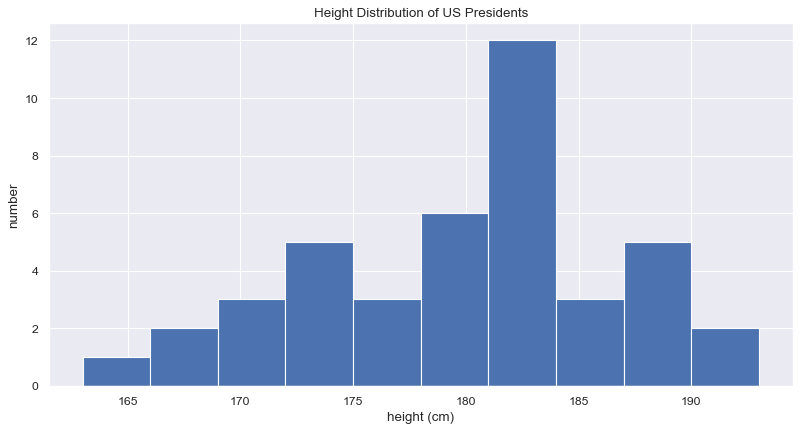

In [133]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
mpl.rcParams['figure.figsize'] = [12, 6]
mpl.rcParams['figure.dpi'] = 80

plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

# Broadcasting

Broadcasting no es más que una serie de reglas que se aplican al usar ufuncs binarios (e.g., adición, substracción, etc.) sobre arrays de distintos tamaños

## Extendiendo valores (*broadcasting*)

Recuerde que en arraus del mismo tamaño, las operaciones binarias se realizan elemento por elemento

In [134]:
import numpy as np

a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Broadcasting permite que estas operaciones binarias se efectúen en arrays de tamaños dinstintos, como por ejemplo entre un escalar y un array

In [135]:
a + 5

array([5, 6, 7])

En el caso anterior, podemos verlo como si `5` se convirtiera en el array `array([5, 5, 5])`.

Se puede extender fácilmente a otras dimensiones.

In [136]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [137]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Aquí es el array unidimensional `a` el que se extiende (*broadcast*) por la segunda dimensión para coincidir con la forma de `M`.

Veamos un ejemplo más complicado.

In [138]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

In [139]:
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [140]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Como en el caso anterior, ahora se han extendido tanto `a` como `b` para coincidir con la forma común, y el resultado es un array de dos dimensiones

![Broadcasting](http://www.astroml.org/_images/fig_broadcast_visual_1.png)
<div style="float: right;">
<small>&mdash; Fuente: [AstroML](http://www.astroml.org/book_figures/appendix/fig_broadcast_visual.html)</small>
</div>

## Reglas del broadcasting

- Regla 1: Si los dos arrays tienen un número de dimensiones distinto, la forma (*shape*) del que tenga menos dimensiones se rellena con unos por su lado izquierdo.
- Regla 2: Si la forma (*shape*) de los dos arrays no coinciden en ninguna dimensión, el array con forma (*shape*) igual a 1 en esa dimensión se expande para coincidir con la otra forma (*shape*).
- Regla 3: Si en ninguna dimensión los tamaños son siguales y ninguna es igual a 1, se produce un error.

### Ejemplo broadcasting 1

In [141]:
M = np.ones((2, 3))
a = np.arange(3)

In [142]:
a

array([0, 1, 2])

In [143]:
M

array([[1., 1., 1.],
       [1., 1., 1.]])

Consideremos una operación entre estos dos arrays. La forma de cada uno es la siguiente:

- ``M.shape = (2, 3)``
- ``a.shape = (3,)``

Por la regla 1, vemos que `a` tiene menos dimensiones, así que rellenamos por la izquierda con unos:

- ``M.shape -> (2, 3)``
- ``a.shape -> (1, 3)``

Por la relga 2, ahora vemos que la primera dimensión no coincide, así que la expandimos para que coincida:

- ``M.shape -> (2, 3)``
- ``a.shape -> (2, 3)``

Ahora las formas coinciden, y la forma final será ``(2, 3)``:

In [144]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

### Ejemplo broadcasting 2

In [145]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

In [146]:
a

array([[0],
       [1],
       [2]])

In [147]:
b

array([0, 1, 2])

De nuevo, las formas de los arrays son:

- ``a.shape = (3, 1)``
- ``b.shape = (3,)``

La regla 1 dice que debemos rellenar la forma de `b` con unos:

- ``a.shape -> (3, 1)``
- ``b.shape -> (1, 3)``

Y la regla 2 que debemos subir cada uno de estos unos para que coincidan con el tamaño del otro array:

- ``a.shape -> (3, 3)``
- ``b.shape -> (3, 3)``

In [148]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Ejemplo broadcasting 3

Veamos ahora un ejemplo donde la operación no es compatible.

In [149]:
M = np.ones((3, 2))
a = np.arange(3)

In [150]:
M

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [151]:
a

array([0, 1, 2])

Las formas de los arrays son:

- ``M.shape = (3, 2)``
- ``a.shape = (3,)``

Rellenamos con unos de acuerdo a la regla 1:

- ``M.shape -> (3, 2)``
- ``a.shape -> (1, 3)``

Por la regla 2, estiramos la primera dimensión de `a` para que coincida con la de `M`:

- ``M.shape -> (3, 2)``
- ``a.shape -> (3, 3)``

Y ahora por la regla 3, como los tamaños no coinciden, los dos arrays son incompatibles.

In [152]:
try:
    M + a
except Exception as e:
    print(e)

operands could not be broadcast together with shapes (3,2) (3,) 


<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Para *centrar* un array bidimensional es necesario obtener la media de cada columna y restarla a cada uno de los elementos de la columna correspondiente. Dado un array aleatorio `X` de forma $10 \times 3$, obtenga el array `X_centered` con el array ahora centrado. Compruebe que ahora la media de cada columna es cero (con la precisión épsilon de la máquina)
</p>
</div>

In [153]:
# Escriba su solución aquí

array([-4.44089210e-17,  3.33066907e-17, -9.43689571e-17])

# Comparaciones,  máscaras, y lógica booleana

En NumPy, para según qué operaciones como extraer, modificar, contar o incluso multiplicar valores basándose en algún criterio, la manera más eficiente suele ser a través de máscaras booleanas.

## Ejemplo: contar los días lluviosos

Vamos a usar los datos de precipitaciones de la ciudad de Seattle en 2014.

In [154]:
import numpy as np
import pandas as pd

In [155]:
url = "https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/Seattle2014.csv"
rainfall = pd.read_csv(url)['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches, que para eso son americanos!
inches.shape

(365,)

El array contiene 365 valores, uno para cada día del año y su precipitación en pulgadas del 1 de enero al 31 de diciembre de 2014.

Representemos rápidamente un histograma de los días lluviosos (histogramas y otras visualizaciones serán vistos en otra sesión en profundidad).

In [156]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

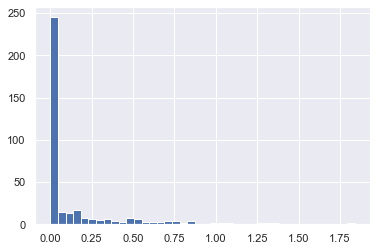

In [157]:
plt.hist(inches, 40);

A pesar de la fama, parece que la gran mayoría de días del año no llueve. Aunque lo cierto es que es difícil ver cuántos días lluviosos hay al año, o la precipitación media de los dísa en que llueve. Veamos la manera de obtener esta información usando NumPy ufuncs como operadores de comparación.

## Ufuncs como operadores de comparación

NumPy también implementa los operadores de comparación como `<` y `>` como ufuncs, de manera que el resultado de las comparaciones es siempre un array booleano.

In [158]:
x = np.array([1, 2, 3, 4, 5])
x

array([1, 2, 3, 4, 5])

In [159]:
x < 3  # menor que

array([ True,  True, False, False, False])

In [160]:
x > 3  # mayor que

array([False, False, False,  True,  True])

In [161]:
x <= 3  # menor o igual que

array([ True,  True,  True, False, False])

In [162]:
x >= 3  # mayor o igual que

array([False, False,  True,  True,  True])

In [163]:
x != 3  # distinto

array([ True,  True, False,  True,  True])

In [164]:
x == 3  # igual

array([False, False,  True, False, False])

E incluso expresiones

In [165]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

Y tal y como sucecía con los operadores aritméticos, los operadores de comparación también tienen están implementados como ufuncs, de manera que ``x < 3`` es equivalente a escribir ``np.less(x, 3)``.


| Operador	    |            ufunc    | Operador	   |  ufunc              |
|---------------|---------------------|---------------|---------------------|
|``==``         |``np.equal``         |``!=``         |``np.not_equal``     |
|``<``          |``np.less``          |``<=``         |``np.less_equal``    |
|``>``          |``np.greater``       |``>=``         |``np.greater_equal`` |



In [166]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [167]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])


## Arrays booleanos

Existe toda una seria de operaciones que se pueden hacer a partir de arrays booleanos como los originados como resultado de las operaciones booleanas sobre arrays.

### Contar

``np.count_nonzero`` cuenta el número de valores `True` en un array, lo que puede resultar muy útil.

In [168]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In [169]:
# ¿cuántos valores hay menores de 6?
np.count_nonzero(x < 6)

8

In [170]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [171]:
np.count_nonzero(x)

11

También podríamos usar la función ``np.sum``, ya que los valores ``False`` se interpretan como ``0``, y los ``True`` como ``1``.

In [172]:
np.sum(x < 6)

8

Esto cuenta el número de valores menores que 6 en cada fila del array.

Si estamos interesados en comprobar rápidamente si alguno o todos los valores de un array son verdaderos, podemos usar ``np.any`` y ``np.all``, que permiten comprobar rápidamente si un array tiene algún valor `True` o si todos lo son, respectivamente.

In [173]:
# ¿hay algún valor mayor a 8?
np.any(x > 8)

True

In [174]:
# ¿hay algún valor negativo?
np.any(x < 0)

False

In [175]:
# ¿son todos los valores menores que 10?
np.all(x < 10)

True

In [176]:
# ¿son todos los valores iguales a 6?
np.all(x == 6)

False

`np.sum`, ``np.all`` y ``np.any`` también admiten un parámetro extra para el eje a usar.

In [177]:
# ¿son todos los valores en cada fila menores que 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

### Boolean operators

Las comparaciones booleanas también se pueden componer usando los *operadores lógicos de bit*, ``&``, ``|``, ``^``, y ``~``.

In [178]:
np.sum((inches > 0.5) & (inches < 1))

29



| Operador	    |  ufunc    | Operador	    |  ufunc    |
|---------------|---------------------|---------------|---------------------|
|``&``          |``np.bitwise_and``   |&#124;         |``np.bitwise_or``    |
|``^``          |``np.bitwise_xor``   |``~``          |``np.bitwise_not``   |

Ahora, el poder expresivo de lo que podemos calcular aumenta considerablemete.

In [179]:
print("Número de días sin lluvia:                 ", np.sum(inches == 0))
print("Número de días con lluvia:                 ", np.sum(inches != 0))
print("Días con más de media pulgada:             ", np.sum(inches > 0.5))
print("Días lluviosos con menos de 0.2 pulgadas:  ", np.sum((inches > 0) & (inches < 0.2)))

Número de días sin lluvia:                  215
Número de días con lluvia:                  150
Días con más de media pulgada:              37
Días lluviosos con menos de 0.2 pulgadas:   75


## Arrays booleanos como máscaras

Los arrays booleanos pueden usarse como máscaras para seleccionar subconjuntos particulares de datos.

In [180]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [181]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [182]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [183]:
# array con sólo los días lluviosos
rainy = (inches > 0)

In [184]:
172 + 90

262

In [185]:
# array con los días de verano (el 21 de junio es el día 172, y el verano dura ~90 días)
days = np.arange(365)
summer = (days > 172) & (days < 172 + 90)

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Usando las definiciones dadas más arriba de días lluviosos, `rainy`, y de verano, `summer`, calcular la precipitación mediana en días lluviosos, en días de verano, y en días lluviosos que no sean en verano, y la precipitación máxima en días de verano.</p>
</div>

In [186]:
# Complete la solución
print("Precipitación mediana en días lluviosos:             ", ...)
print("Precipitación mediana en días de verano:             ", ...)
print("Precipitación máxima en días de verano:              ", ...)
print("Precipitación mediana en días lluviosos no en verano:", ...)

Precipitación mediana en días lluviosos:              0.19488188976377951
Precipitación mediana en días de verano:              0.0
Precipitación máxima en días de verano:               0.8503937007874016
Precipitación mediana en días lluviosos no en verano: 0.20078740157480315


# Indizado sofisticado (*fancy indexing*)

El indizado sofisticado (*fancy indexing*) es como el indizado simple pero en lugar de pasar números sencillos pasamos arrays de índices. El resto de reglas tanto de selección como de *broadcasting* se siguen aplicando.

In [187]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

Supongamos que necesitamos acceder a tres elementos distintos del array `x`

In [188]:
[x[3], x[7], x[2]]

[71, 86, 14]

Alternativamente, podemos pasar un array con los índices

In [189]:
ind = [3, 7, 2]
x[ind]

array([71, 86, 14])

La forma del resultado de aplicar indizado sofisticado la del *array índice* en lugar de la del *array siendo indizado*:

In [190]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

Por supuesto, el indizado sofisticado también funciona con arrays multidimensionales

In [191]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [192]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Escriba la expresión, para, dado un array `arr`, reemplazar todos los valores impares por -1..</p>
</div>

In [193]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
# Escriba su expresión aquí

arr

array([ 0, -1,  2, -1,  4, -1,  6, -1,  8, -1])

# Ordenando arrays

Aunque Python viene con las funciones ``sort`` y ``sorted`` para ordenar listas, las alternativas para arrays de NumPy son mucho más rápidas y eficientes (se ejecuta el algoritmo *quicksort* con $\mathcal{O}[N\log N]$, aunque *mergesort* y *heapsort* también están disponibles)

La función ``np.sort`` devuelve un nuevo array ordenado.

In [194]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

También es posible ordenar el propio array.

In [195]:
x.sort()
print(x)

[1 2 3 4 5]


Una función relacionada es ``argsort``, que devuelve los *índices* de los elementos ordenados.

In [196]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [197]:
x[i]

array([1, 2, 3, 4, 5])

### Ordenando por filas o columnas

El parámetro `axis` también está disponible.

In [198]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [199]:
# ordena cada columna de X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [200]:
# ordena cada fila de X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

# Arrays estructurados en NumPy y los DataFrame de Pandas

No siempre tenemos la oportunidad de trabajar con arrays homogéneos de valores. A veces se necesita algo de estructura que aporte semántica a nuestras operaciones. Los *arrays estructurados* de NumPy hacen precisamente eso, proporcionando almacenamiento eficiente para tipos compuestos y heterogéneos de datos. Si bien, el soporte de NumPy es básico y para operaciones más complejas se suele recurrir a los `DataFrame`s de Pandas

In [201]:
import numpy as np

Imaginemos que tenemos varias categorísa de datos de un número de personas.

In [202]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

Podemos crear un array estructurado usando un tipo de dato compuesto en el parámetro `dtype`.

In [203]:
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                          'formats':("U10", int, float)})  # U10 es para cadenas de 10 caracteres
print(data.dtype)

[('name', '<U10'), ('age', '<i8'), ('weight', '<f8')]


In [204]:
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


Si quisiéramos acceder a los valores como atributos, entonces podríamos usar `np.recarray`

In [205]:
data_rec = data.view(np.recarray)
data_rec.age

array([25, 45, 37, 19])

Ahora tenemos todos nuestros datos juntos y dispuestos en un bloque de memoria, lo que además nos permite referirnos a los valores por sus índices o por sus nombres.

In [206]:
# obtener todos los nombres
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [207]:
# primea fila de datos
data[0]

('Alice', 25, 55.)

In [208]:
# nombre de la última fila
data[-1]['name']

'Doug'

In [209]:
# nombre de los menores de 30
data[data['age'] < 30]['name']

array(['Alice', 'Doug'], dtype='<U10')

## Bienvenido sea Pandas

En general, Pandas proporciona una mayor cobertura de operaciones para datos estructurados. Así que a no ser que se necesite operar con formatos binarios en C, Fortran u otros lengajes, Pandas es la opción.

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Los datos en `ventas.csv` describen las ventas anuales de camisetas, pantalones, y calcetines en un determinado establecimiento. Calcular e imprimir, basándose en los datos de `ventas.csv`: 
    
1. La media y la desviación estándar de las ventas de cada producto por año. 
2. ¿En qué año tuvo cada artículo la mejor venta?
3. ¿Qué prenda tuvo la mejor venta para cada año?. (*Pista*: argsort & fancy indexing de `np.array(['camiseta', 'pantalones', 'calcetines'])`). 
4. ¿En qué años hay ventas para alguno de los artículos mayores a 500? (*Pista*: comparaciones y `np.any`). 
5. Los 2 peores años en venta para cada prenda. (*Pista*: `argsort`, fancy indexing). 


 Y todo <strong>sin un solo bucle</strong>.

</p>
</div>

In [210]:
# No hay que hacer en esta celda
import numpy as np

np.set_printoptions(precision=4)
data = pd.read_csv("https://raw.githubusercontent.com/versae/master-us-ipppd/master/data/ventas.csv")
year = data["año"].values
camisetas = data.camisetas.values
pantalones = data.pantalones.values
calcetines = data.calcetines.values
prendas = data.columns[1:].values
ventas = data.values[:, 1:]

In [211]:
# 1

	 camisetas pantalones calcetines
Media:   [340.8095 201.6667 424.    ]
Std:     [208.9791 162.5459  33.2251]


In [212]:
# 2

	 camisetas pantalones calcetines
Max. año: [1993 1994 1990]


In [213]:
# 3

Max. prendas:
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010]
['calcetines' 'calcetines' 'camisetas' 'camisetas' 'pantalones'
 'pantalones' 'calcetines' 'calcetines' 'calcetines' 'calcetines'
 'calcetines' 'calcetines' 'camisetas' 'camisetas' 'camisetas'
 'pantalones' 'calcetines' 'calcetines' 'calcetines' 'calcetines'
 'calcetines']


In [214]:
# 4

Por encima de 500: [1992 1993 1994 2002 2003 2004 2005]


In [215]:
# 5

Peores 2 años:
camisetas pantalones calcetines
[[2007 1990 2006]
 [2006 1991 1993]]
